In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import klib
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE (6) (1).csv', header  = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [125]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [126]:
df.loc[:122,"Region"] = 0 # The first region will be categorized as 0
df.loc[122:, "Region"] = 1 # The second region will be categorized as 1
dataset = df

In [127]:
df[['Region']] = df[["Region"]].astype(int)

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [129]:
df.index[df.isnull().any(axis=1)]

Int64Index([122, 167], dtype='int64')

In [130]:
df =df.dropna().reset_index(drop = True)

In [131]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [132]:
df = df.drop(122).reset_index(drop = True)

In [133]:
df.columns = df.columns.str.strip()

In [134]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [135]:
df[['day', 'month', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'Temperature', 'RH', 'Ws']].astype(int)

In [136]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [137]:
df.drop('day',inplace = True, axis = 1)

In [138]:
df.to_csv('Algerian_forest_fire_cleaned.csv')

In [139]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [140]:
df['Classes']= np.where(df['Classes'].str.contains('not fire'), 0,1)
# If classes col contains 'not fire' , assign it to 0 else 1

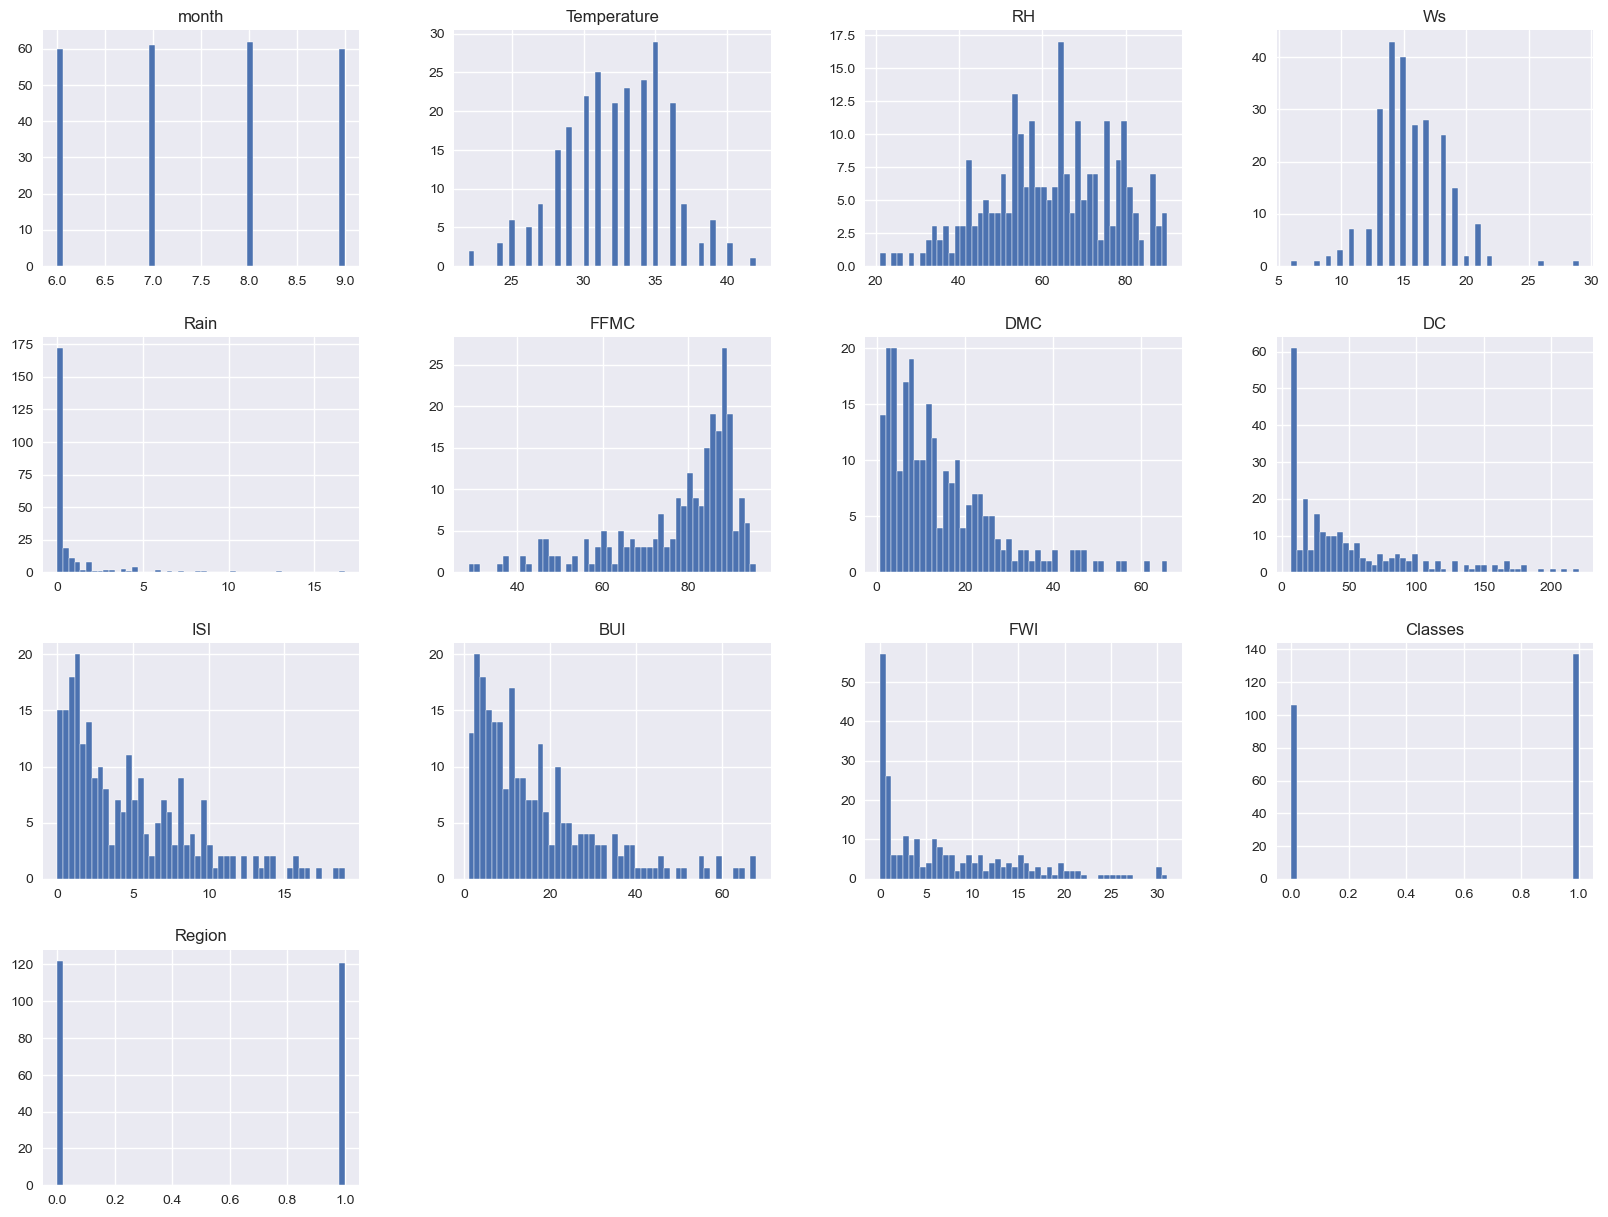

In [141]:
plt.style.use('seaborn')
df.hist(bins = 50, figsize = (20,15))
plt.show()

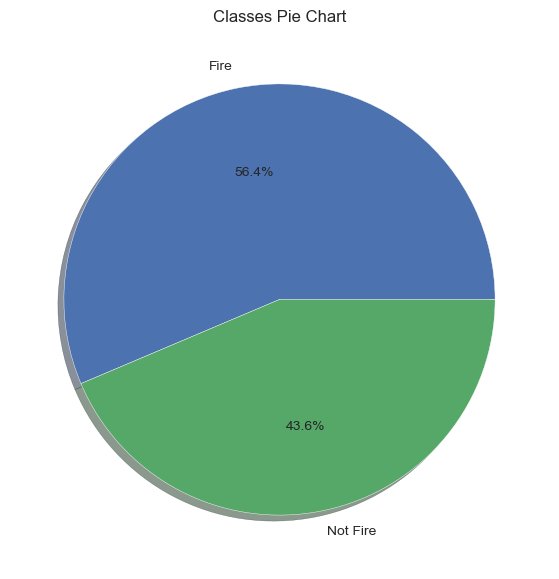

In [142]:
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize = (12,7))
plt.pie(df['Classes'].value_counts(), labels = classlabels, autopct = '%1.1f%%',shadow = True)
plt.title('Classes Pie Chart')
plt.show()

In [143]:
df.corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
month,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.085073,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


<Axes: >

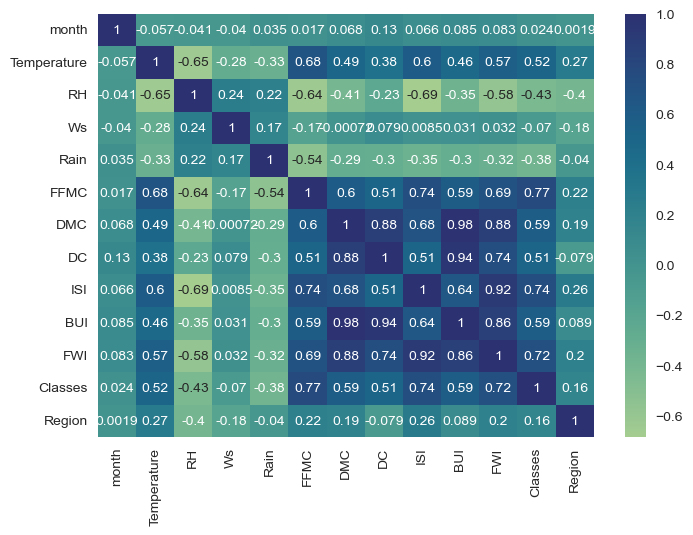

In [144]:
sns.heatmap(df.corr(), annot = True, cmap = 'crest')

### Monthly Fire Analysis

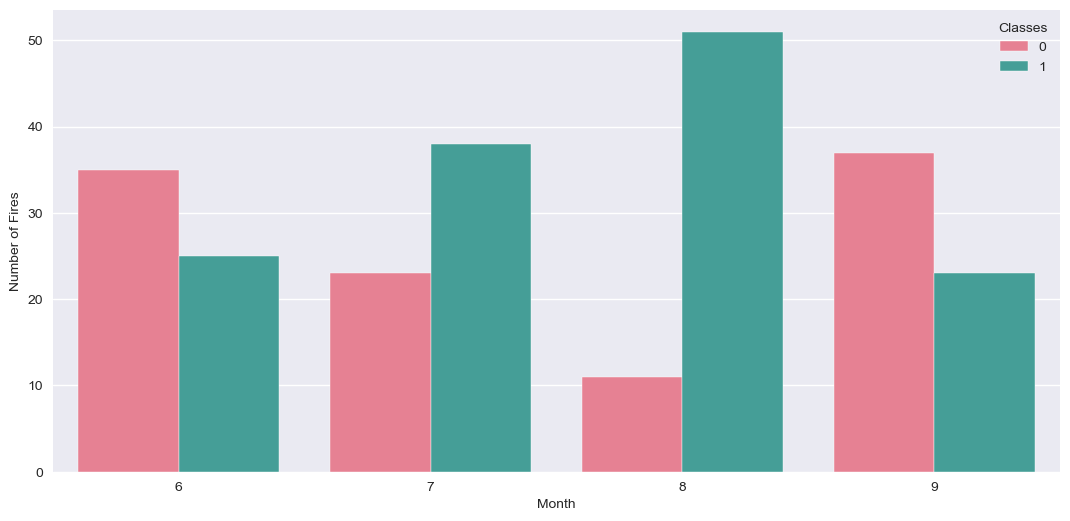

In [145]:
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = df, palette='husl')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

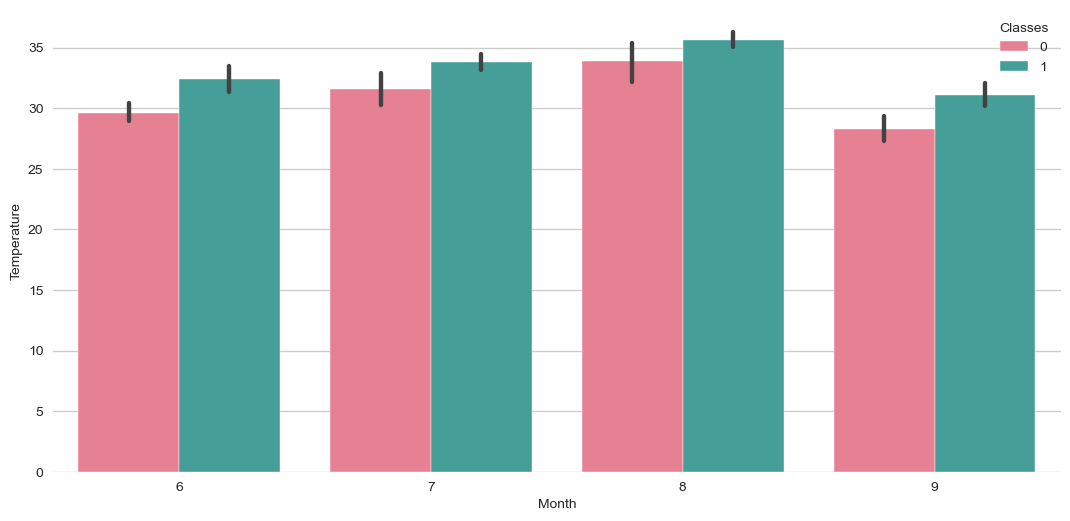

In [146]:
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.barplot(x = 'month',y = 'Temperature', hue = 'Classes', data = df, palette='husl')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

### Observation: 
We can observe that number of fires increase from June to August as the temperature rises

### Machine Learning

In [147]:
X = df.drop(['FWI','month','year','DC','BUI'], axis = 1)
y = df['FWI']
# Splitting independent and dependent features

In [148]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0
...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,4.5,1,1
239,28,87,15,4.4,41.1,6.5,0.1,0,1
240,27,87,29,0.5,45.9,3.5,0.4,0,1
241,24,54,18,0.1,79.7,4.3,1.7,0,1


In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [150]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.666832,-0.363524,-0.353372,0.684186,0.485272,0.610784,0.497727,0.316034
RH,-0.666832,1.000000,0.268542,0.252659,-0.639914,-0.400913,-0.700103,-0.431097,-0.442337
Ws,-0.363524,0.268542,1.000000,0.219551,-0.238520,-0.026332,-0.025648,-0.106459,-0.188898
Rain,-0.353372,0.252659,0.219551,1.000000,-0.588079,-0.300879,-0.351447,-0.377688,-0.076930
FFMC,0.684186,-0.639914,-0.238520,-0.588079,1.000000,0.610152,0.736174,0.765968,0.275874
DMC,0.485272,-0.400913,-0.026332,-0.300879,0.610152,1.000000,0.673975,0.592269,0.194039
ISI,0.610784,-0.700103,-0.025648,-0.351447,0.736174,0.673975,1.000000,0.732387,0.313642
Classes,0.497727,-0.431097,-0.106459,-0.377688,0.765968,0.592269,0.732387,1.000000,0.209882
Region,0.316034,-0.442337,-0.188898,-0.076930,0.275874,0.194039,0.313642,0.209882,1.000000


<Axes: >

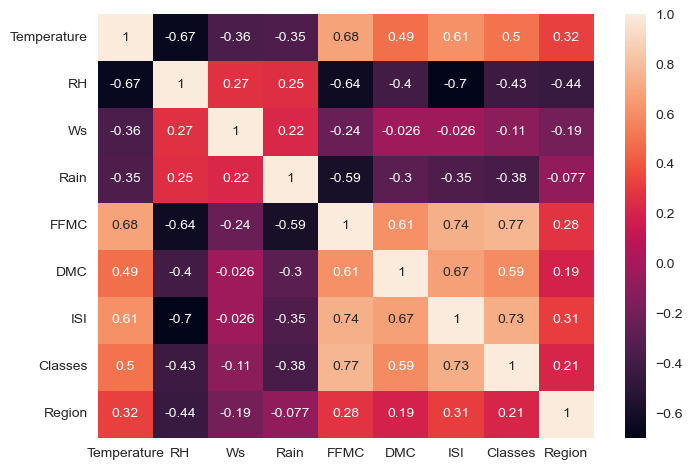

In [151]:
sns.heatmap(X_train.corr(), annot = True)

In [152]:
# Removing the columns with high colinearity to avoid multi-colinearity
def correlation(dataset, threshold):
    cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>= threshold:
                col_name = corr_matrix.columns[i]
                cols.add(col_name)
                
    return cols

In [153]:
corr_features = correlation(X_train, 0.85)
corr_features

set()

In [154]:
X_train.drop(corr_features, inplace = True, axis = 1)
X_test.drop(corr_features, inplace = True, axis = 1)

### Feature Scaling

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [156]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression Model

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [159]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [160]:
y_pred = regressor.predict(X_test)

In [161]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6700307048370666
R2_Score : 0.9773899683550065


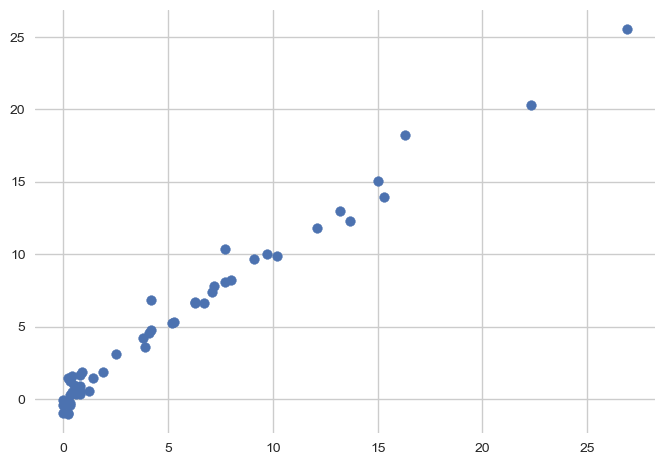

In [162]:
plt.scatter(y_test, y_pred)

### Lasso Regression

In [163]:
from sklearn.linear_model import Lasso

In [164]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [165]:
y_pred = lasso.predict(X_test)

In [166]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  1.1144861330607514
R2_Score : 0.9433416904087941


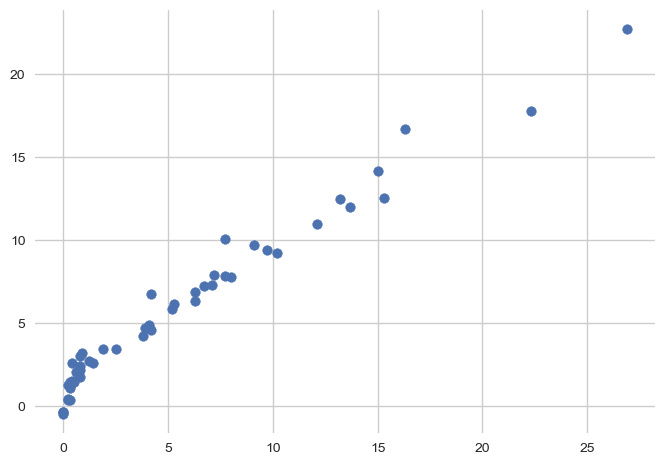

In [167]:
plt.scatter(y_test, y_pred)

### Cross Validation Lasso

In [168]:
from sklearn.linear_model import LassoCV

In [169]:
lassocv = LassoCV(cv = 6)
lassocv.fit(X_train, y_train)

LassoCV(cv=6)

In [170]:
y_pred = lassocv.predict(X_test)

In [171]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6602056449716723
R2_Score : 0.9774770545358796


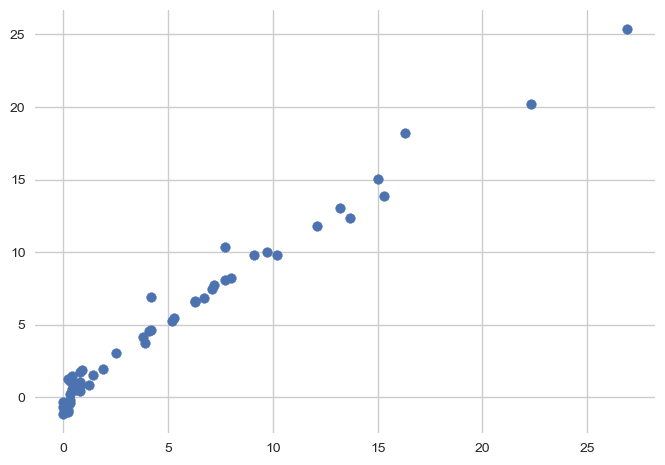

In [172]:
plt.scatter(y_test, y_pred)

### Ridge Regression

In [173]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [174]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [175]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.6905345455834934
R2_Score : 0.9766228010748004


### Ridge Cross Vlaidation

In [176]:
from sklearn.linear_model import RidgeCV

In [177]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)

In [178]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  0.8714379868451502
R2_Score : 0.9677330008807273


In [179]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### ElasticNet 

In [180]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [181]:
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

In [182]:
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE: ' , mae)
print('R2_Score :', score)

MAE:  1.7415526320622194
R2_Score : 0.8777177823187075


### Pickling the model

In [183]:
import pickle 
pickle.dump(scaler, open('scaler.pkl', 'wb'))
# For standard scaling the new data
pickle.dump(ridge, open('ridge.pkl', 'wb'))
# For predicting with the data